The following notebook will be the exploratory data analysis of the rating data set 
that is created in book_analysis. 

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

#### Load data

In [108]:
data_path = 'D:\\PycharmProjects\\springboard\\data\\'
rating = pd.read_csv(f'{data_path}book_rating.csv')

# data info
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271379 non-null  object 
 1   book_title           271379 non-null  object 
 2   book_author          271378 non-null  object 
 3   year_of_publication  271379 non-null  object 
 4   publisher            271377 non-null  object 
 5   book_rating          270170 non-null  float64
dtypes: float64(1), object(5)
memory usage: 12.4+ MB


d:\pycharmprojects\springboard\venv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
# Create book_title_length column
# Note that we also include white space in the title as without it the title doesnt 
# make much sense!
rating['book_title_length'] = rating['book_title'].str.len()

In [119]:
# Top publisher by number of books
top_20_publisher = list(rating.publisher.value_counts()[:20].index)

# Set pattern for top 20 publisher
pat = '|'.join(top_20_publisher)

# Columns for top 20 publishers
rating['top_20_publisher'] = rating['publisher'].str.contains(f'({pat})').fillna(value=False)
rating['top_20_publisher'] = rating['top_20_publisher'].astype('category')
rating[rating['top_20_publisher'] == True].groupby('publisher')['ISBN'].count().sort_values(ascending=False)

d:\pycharmprojects\springboard\venv\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


publisher
Harlequin                       7535
Silhouette                      4220
Pocket                          3905
Ballantine Books                3783
Bantam Books                    3646
                                ... 
Scholastic / Cartwheel Books       1
Scholastic 10x8 paperback          1
Scholastic 8x6 paperback           1
Scholastic Apple Paperbacks        1
A Disney/Bantam Books              1
Name: ISBN, Length: 229, dtype: int64

In [120]:
# Top authors list
top_authors = ['Stephen King', 'J.K. Rowling', 'J. K. Rowling', 'James Patterson', 'John Grisham', 'Dan Brown',
               'Michael Wolff', 'Nora Roberts', 'Danielle Steel', 'Rick Riordan', 'Tolkien']

# Set pattern for top authors
pat = '|'.join(top_authors)

# Top author columns
rating['top_author'] = rating['book_author'].str.contains(f'({pat})', regex=True).fillna(value=False)
rating['top_author'] = rating['top_author'].astype('category')
rating[rating['top_author']==True].groupby('book_author')['ISBN'].count().sort_values(ascending=False)

d:\pycharmprojects\springboard\venv\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


book_author
Stephen King                 524
Nora Roberts                 315
J. R. R. Tolkien             174
Danielle Steel               173
John Grisham                 138
James Patterson              111
J. K. Rowling                 78
J.R.R. Tolkien                46
Dan Brown                     20
John Ronald Reuel Tolkien     19
J.K. Rowling                  10
J R R Tolkien                  9
J. R. R Tolkien                7
Rick Riordan                   5
Tolkien                        3
Michael Wolff                  3
Christopher Tolkien            2
Tolkien J.R.R.                 1
Danielle Steele                1
John R. R. Tolkien             1
Michael Wolffsohn              1
Tolkienquest                   1
Name: ISBN, dtype: int64

#### Exploratory Data Analysis

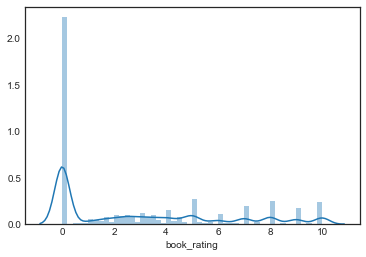

In [121]:
# Rating distribution
sns.distplot(rating.book_rating)

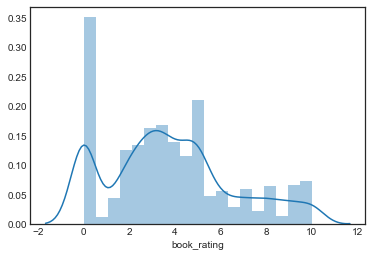

In [123]:
# Rating Among top authors 
sns.distplot(rating[rating['top_author']==True].book_rating)

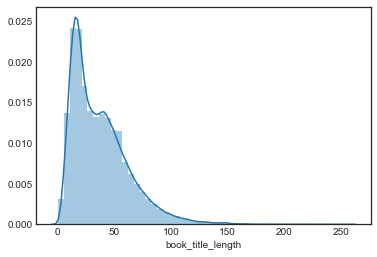

In [125]:
# Book title length distribution
sns.distplot(rating.book_title_length)